In [513]:
import pandas as pd
import matplotlib.pyplot as plt
import catboost
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn

pd.options.display.max_columns = 100

In [527]:
train_month_df = pd.read_excel('/Users/nikitaromanov/Downloads/Участникам/Train.xlsx', sheet_name='Monthly').drop(0)
train_quart_df = pd.read_excel('/Users/nikitaromanov/Downloads/Участникам/Train.xlsx', sheet_name='Quarterly').drop(0)

In [528]:
train_month_df['month'] = [int(x[-2:]) for x in train_month_df['Unnamed: 0'].tolist()]
train_month_df['year'] = [int(x[:4]) for x in train_month_df['Unnamed: 0'].tolist()]

train_quart_df['month'] = [int(x[-2:]) for x in train_quart_df['Unnamed: 0'].tolist()]
train_quart_df['year'] = [int(x[:4]) for x in train_quart_df['Unnamed: 0'].tolist()]

train_month_df['year'] -= train_month_df['year'].min()
train_quart_df['year'] -= train_quart_df['year'].min()

train_month_df['month_num'] = train_month_df['month'] + train_month_df['year'] * 12
train_quart_df['month_num'] = train_quart_df['month'] + train_quart_df['year'] * 12

train_month_df.drop('Unnamed: 0', axis=1, inplace=True)
train_quart_df.drop('Unnamed: 0', axis=1, inplace=True)

In [522]:
cols = cluster_data.columns.to_list()[:-3]
cluster_table = None
for i in range(len(cluster_data.columns.to_list()[:-3])):
    
    values = cluster_data[cols[i]].dropna().tolist()
    new = [abs(values[x]-values[x-1]) for x in range(1, len(values))]
    
    all_features = cluster_data[cols[i]].agg(['mean'])
    all_features['mean_diff'] = np.mean(new)
    all_features['median_diff'] = np.median(new)
    all_features['std_diff'] = np.std(new)
    all_features['max_diff'] = np.max(new)
    all_features['min_diff'] = np.min(new)
    if i == 0:
        cluster_table = pd.DataFrame(all_features).transpose()
    else:
        cluster_table = pd.concat([cluster_table, pd.DataFrame(all_features).transpose()])

from sklearn import datasets
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(cluster_table)

all_predictions = model.predict(cluster_table)

cluster_table['class'] = all_predictions
cluster_table

,mean,mean_diff,median_diff,std_diff,max_diff,min_diff,class
"Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения",4.554761e-16,0.482861,0.365684,0.343066,1.828422,0.000000,3
"Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения",6.376666e-16,0.526631,0.500784,0.400062,1.836207,0.000000,3
"Диффузный индекс заработной платы, ожидаемые изменения",-9.109522e-17,0.378085,0.317919,0.326580,1.801542,0.000000,3
"Диффузный индекс занятости, ожидаемые изменения",-4.953303e-16,0.525060,0.500313,0.388601,1.834481,0.000000,3
"Диффузный индекс выпуска, ожидаемые изменения",4.554761e-17,0.523242,0.366980,0.451647,2.293624,0.000000,2
"Диффузный индекс закупок оборудования, ожидаемые изменения",-4.099285e-16,0.531891,0.483065,0.473932,2.415325,0.000000,2
"Диффузный индекс финансового состояния, ожидаемые изменения",-6.832142e-17,0.560656,0.484807,0.402605,2.181632,0.000000,2
"Диффузный индекс портфеля заказов, ожидаемые изменения",1.138690e-16,0.579814,0.510052,0.444390,2.040210,0.000000,3
"Диффузный индекс задолженности банкам, ожидаемые изменения",4.554761e-16,0.963461,0.853351,0.803500,4.266757,0.000000,1
"Производство скота и птицы, тыс.тонн",7.039953e-15,0.419975,0.223283,0.543380,2.569862,0.000000,2


In [524]:
classes = [
    [ # Спокойный рост
    'Индекс тарифов на грузоперевозки',
    'Реальная пенсия',
    'Реальные товарные запасы в организациях розничной торговли',
    'Среднемесячная пенсия, руб.',
    'Средние цены производителей, газ',
    'Товарные запасы в организациях розничной торговли, млрд.руб.'
],
    
    [
    'Долгосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб',
    'Индекс потребительских цен',
    'Индекс потребительских цен, непродовольственные',
    'Индекс потребительских цен, продукты',
    'Индекс потребительских цен, услуги',
    'Средние цены производителей, инвестиционные товары',
    'Средние цены производителей, крупный рогатый скот',
    'Средние цены производителей, строительная продукция',
],
    
    
    [ # Что то типа курса доллара
    'Диффузный индекс задолженности банкам, ожидаемые изменения ',
    'Диффузный индекс занятости, ожидаемые изменения ',
    'Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения ',
    'Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения ',
    'Диффузный индекс заработной платы, ожидаемые изменения ',
    'Диффузный индекс закупок оборудования, ожидаемые изменения ',
    'Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения ',
    'Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения ',
    'Коммерческий грузооборот транспорта, млрд.т-км ',
    'Ставка по долгосрочным кредитам, фирмы',
    'Ставка по краткосрочным кредитам, фирмы',
    'Экспорт товаров,  млрд. долл., index',
    'Экспорт товаров, СНГ, млрд. долл., index',
],
    
    [ # Можно захардкодить (Сезонность)
    'Диффузный индекс финансового состояния, ожидаемые изменения ',
    'Диффузный индекс портфеля заказов, ожидаемые изменения ',
    'Ввод в действие жилых домов, млн кв.м',
    'Диффузный индекс выпуска, ожидаемые изменения ',
    'Производство скота и птицы, тыс.тонн ',
    'Производство молока, тыс.тонн ',
    'Производство яиц, млн',
    'Диффузный индекс заработной платы, ожидаемые изменения ',
    'Диффузный индекс портфеля заказов, ожидаемые изменения ',
    'Диффузный индекс финансового состояния, ожидаемые изменения ',
    'Ж/д перевозки,  млн.тонн.',
    'Инвестиции, млрд. рублей',
    'Обеспеченность оборота розничной торговли запасами, дней',
    'Производство яиц, млн',
    'Реальная зарплата',
    'Реальные инвестиции, млрд. рублей',
    'Реальный оборот розничной торговли',
    'Реальный оборот розничной торговли, непродовольственные',
    'Реальный оборот розничной торговли, продукты',
    'Реальный объем платных услуг',
    'Среднемесячная зарплата, руб.',
    'Средние цены производителей, яйца',
    'Строительство, млрд. руб.', 
],
    
    [ # Очень сильно волотильны
    'MIACR',
    'Безработицв',
    'Курс доллара',
    'Курс евро',
    'Средние цены производителей, дизельное топливо',
    'Средние цены производителей, животноводство',
    'Средние цены производителей, мазут',
    'Средние цены производителей, молоко',
    'Средние цены производителей, нефть',
    'Цена Urals, долл/бар',
    'Грузооборот транспорта, млрд.т-км ',
    'Импорт товаров,  млрд. долл., index',
    'Импорт товаров, СНГ, млрд. долл., index',
    'Ставка по долгосрочным кредитам, население',
    'Ставка по краткосрочным кредитам, население',
    'Нагрузка не занятого трудовой деятельностью населения',
    'Средние цены производителей, бензин',
],
    
    [
    'Оборот розничной торговли, млрд.руб.',
    'Оборот розничной торговли, непродовольственные, млрд.руб.',
    'Оборот розничной торговли, продукты, млрд.руб.'
],
    
    [
    'Краткосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб',
    'Средние цены производителей, птица',
    'Средние цены производителей, уголь',
]]

'Ввод в действие жилых домов, млн кв.м',


Text(0, 0.5, 'Ввод в действие жилых домов, млн кв.м')

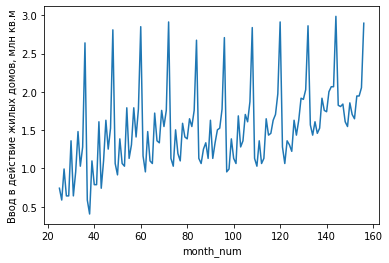

In [9]:
id = 70
col = 'Ввод в действие жилых домов, млн кв.м' # sorted(train_month_df.columns.tolist())[id]

print(f"'{col}',")

plt.plot(train_month_df['month_num'], train_month_df[col])
plt.xlabel('month_num')
plt.ylabel(col)

In [511]:
cluster_table['class'] = all_predictions
cluster_classes = [cluster_table[cluster_table['class'] == i].index.to_list() for i in range(5)]
cluster_classes

[['Диффузный индекс задолженности банкам, ожидаемые изменения ',
  'Реальные инвестиции, млрд. рублей',
  'Ввод в действие жилых домов, млн кв.м',
  'Дефицит бюджета, млрд.руб.',
  'Обеспеченность оборота розничной торговли запасами, дней',
  'Ставка по долгосрочным кредитам, население'],
 ['Экспорт товаров,  млрд. долл., index',
  'Курс доллара',
  'Курс евро',
  'Оборот розничной торговли, млрд.руб.',
  'Оборот розничной торговли, непродовольственные, млрд.руб.',
  'Товарные запасы в организациях розничной торговли, млрд.руб.',
  'Средние цены производителей, нефть',
  'Средние цены производителей, газ',
  'Средние цены производителей, бензин',
  'Средние цены производителей, дизельное топливо',
  'Средние цены производителей, яйца',
  'Безработицв',
  'Потребность работодателей в работниках',
  'Нагрузка не занятого трудовой деятельностью населения',
  'Среднемесячная зарплата, руб.',
  'Реальная зарплата',
  'Цена Urals, долл/бар'],
 ['Диффузный индекс выпуска, ожидаемые изменения 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


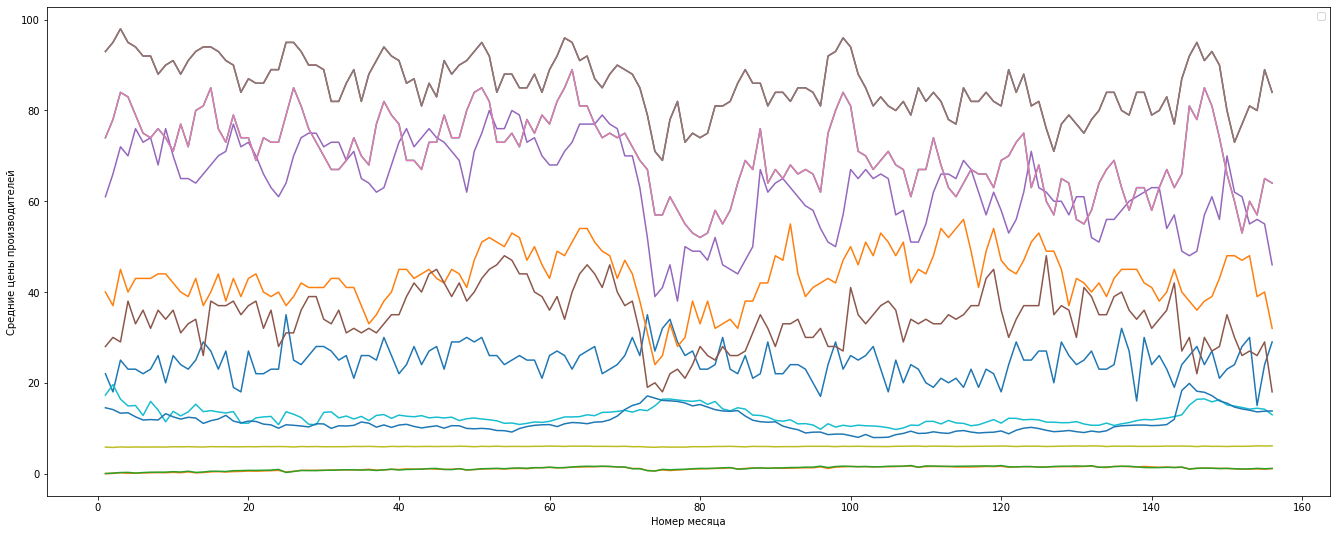

In [534]:
fig= plt.figure(figsize=(23, 9))

for x in classes[2]:
    plt.plot(train_month_df["month_num"], train_month_df[x])
plt.xlabel("Номер месяца")
plt.ylabel("Средние цены производителей")
plt.legend()
plt.show()

In [11]:
values = train_month_df['Ввод в действие жилых домов, млн кв.м'].dropna().values

features, target = [], []

for i in range(len(values)//2, len(values)):
    prev_data = values[:i-1] / values[i-1]
    features.append([prev_data[-x] for x in range(12)])
    target.append(values[i] / values[i-1])

In [ ]:
X = train_month_df['Ввод в действие жилых домов, млн кв.м'].dropna()
y = X.shift(1)

X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = catboost.CatBoostRegressor()
model.fit(X_train, y_train, eval_set=catboost.Pool(X_valid, y_valid))

# Feature engineering

In [315]:
def difference(data, feature):
    # assume data is already sorted
    return data[feature] - data['Total_Sales_dollars'].shift(1)

def difference_in_percentage(data, feature):
    # assume data is already sorted
    lag_by_1 = data[feature].shift(1)
    return (data[feature] - lag_by_1)/(lag_by_1)

def make_features(df, columns):
    final_table = None

    for column in columns:
        Train_Table = df[['month', 'year', 'month_num', column]].dropna().reset_index(drop=True)
        Train_Table.columns = ['month', 'year', 'month_num', 'Total_Sales_dollars']

        '''
        scaler = StandardScaler()
        values = Train_Table['Total_Sales_dollars'].values.reshape((len(Train_Table), 1))
        Train_Table['Total_Sales_dollars'] = scaler.fit_transform(values)
        '''

        Train_Table['Total_Sales_dollars'] = (Train_Table['Total_Sales_dollars'].values - np.mean(Train_Table['Total_Sales_dollars'])) / np.std(Train_Table['Total_Sales_dollars'])

        # extracted_features = extract_features(Train_Table[['Total_Sales_dollars', 'month_num']], column_id="Total_Sales_dollars", column_sort="month_num")

        Train_Table['Total_Sales_Dollars_lag1'] = Train_Table['Total_Sales_dollars'].shift(1)

        Train_Table['Total_Sales_Dollar_MA2_lag1'] = Train_Table['Total_Sales_dollars'].rolling(2).mean().shift(1).reset_index(0,drop=True)

        try:
            Train_Table['Total_Sales_Dollar_Difference_lag1'] = difference(Train_Table,'Total_Sales_dollars').shift(1)
            Train_Table['Total_Sales_Dollar_Difference_in_Percent_Lag1'] = difference_in_percentage(Train_Table,'Total_Sales_dollars').shift(1)
        except Exception:
            continue

        Train_Table = Train_Table.fillna(0)

        for i in range(2, 80):
            Train_Table[f'TSd_{i}'] = Train_Table['Total_Sales_dollars'].shift(i)

        Train_Table = Train_Table.fillna(0)

        final_table = Train_Table if columns.index(column) == 0 else pd.concat([final_table, Train_Table])

    return final_table

In [317]:
Train_Table = make_features(train_month_df, cluster_classes[0][:-1])
Train_Table

,month,year,month_num,Total_Sales_dollars,Total_Sales_Dollars_lag1,Total_Sales_Dollar_MA2_lag1,Total_Sales_Dollar_Difference_lag1,Total_Sales_Dollar_Difference_in_Percent_Lag1,TSd_2,TSd_3,TSd_4,TSd_5,TSd_6,TSd_7,TSd_8,TSd_9,TSd_10,TSd_11,TSd_12,TSd_13,TSd_14,TSd_15,TSd_16,TSd_17,TSd_18,TSd_19,TSd_20,TSd_21,TSd_22,TSd_23,TSd_24,TSd_25,TSd_26,TSd_27,TSd_28,TSd_29,TSd_30,TSd_31,TSd_32,TSd_33,TSd_34,TSd_35,TSd_36,TSd_37,TSd_38,TSd_39,TSd_40,TSd_41,TSd_42,TSd_43,TSd_44,TSd_45,TSd_46,TSd_47,TSd_48,TSd_49,TSd_50,TSd_51,TSd_52,TSd_53,TSd_54,TSd_55,TSd_56,TSd_57,TSd_58,TSd_59,TSd_60,TSd_61,TSd_62,TSd_63,TSd_64,TSd_65,TSd_66,TSd_67,TSd_68,TSd_69,TSd_70,TSd_71,TSd_72,TSd_73,TSd_74,TSd_75,TSd_76,TSd_77,TSd_78,TSd_79
0,1,0,1,-0.264933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,2,0.264933,-0.264933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0,3,0.900771,0.264933,0.000000,0.529865,-2.000000,-0.264933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0,4,0.688825,0.900771,0.582852,0.635838,2.400000,0.264933,-0.264933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,0,5,1.324663,0.688825,0.794798,-0.211946,-0.235294,0.900771,0.264933,-0.264933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [364]:
Train_Table = make_features(train_month_df, classes[0] + classes[1] + classes[2] + classes[3]+ classes[4] + classes[5] + classes[6])
Train_Table 

,month,year,month_num,Total_Sales_dollars,Total_Sales_Dollars_lag1,Total_Sales_Dollar_MA2_lag1,Total_Sales_Dollar_Difference_lag1,Total_Sales_Dollar_Difference_in_Percent_Lag1,TSd_2,TSd_3,TSd_4,TSd_5,TSd_6,TSd_7,TSd_8,TSd_9,TSd_10,TSd_11,TSd_12,TSd_13,TSd_14,TSd_15,TSd_16,TSd_17,TSd_18,TSd_19,TSd_20,TSd_21,TSd_22,TSd_23,TSd_24,TSd_25,TSd_26,TSd_27,TSd_28,TSd_29,TSd_30,TSd_31,TSd_32,TSd_33,TSd_34,TSd_35,TSd_36,TSd_37,TSd_38,TSd_39,TSd_40,TSd_41,TSd_42,TSd_43,TSd_44,TSd_45,TSd_46,TSd_47,TSd_48,TSd_49,TSd_50,TSd_51,TSd_52,TSd_53,TSd_54,TSd_55,TSd_56,TSd_57,TSd_58,TSd_59,TSd_60,TSd_61,TSd_62,TSd_63,TSd_64,TSd_65,TSd_66,TSd_67,TSd_68,TSd_69,TSd_70,TSd_71,TSd_72,TSd_73,TSd_74,TSd_75,TSd_76,TSd_77,TSd_78,TSd_79
0,1,0,1,-1.935787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,0,2,-1.933600,-1.935787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0,3,-1.929229,-1.933600,-1.934693,0.002186,-0.001129,-1.935787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,0,4,-1.849752,-1.929229,-1.931415,0.004371,-0.002260,-1.933600,-1.935787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,5,0,5,-1.843200,-1.849752,-1.889491,0.079477,-0.041196,-1.929229,-1.933600,-1.935787,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [365]:
Table = Train_Table.reset_index(drop=True) # .set_index('month_num') подбирать гиперпараметры другой моделью?

training_data, testing_data = train_test_split(Table, test_size=0.2, random_state=42)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 9033
No. of testing examples: 2259


In [366]:
x_train, y_train = training_data.drop("Total_Sales_dollars", axis=1), training_data['Total_Sales_dollars']
x_test, y_test   = testing_data.drop("Total_Sales_dollars", axis=1) , testing_data['Total_Sales_dollars']

In [ ]:
%pip install pmdarima --quiet
import pmdarima as pm

ARIMA_model = pm.auto_arima(y_train, 
                      start_p=2, 
                      start_q=2,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=True, # No Seasonality for standard ARIMA
                      trace=True, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)

ARIMA_model.summary()

In [442]:
y_train = train_month_df['Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения ']

y_train.index = pd.to_datetime(train_month_df['Unnamed: 0'].apply(lambda x: x.replace('m', '-'))) # pd.date_range('2000-01', periods=1497, freq='M')

In [ ]:
from sktime.forecasting.arima import AutoARIMA

model = AutoARIMA(sp=12)
model.fit(y_train)

## XGBOOST

In [367]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor(n_estimators=1100, early_stopping_rounds=100, random_state=42, eval_metric='mae')

model.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-mae:0.65575	validation_1-mae:0.64815
[100]	validation_0-mae:0.08160	validation_1-mae:0.16218
[200]	validation_0-mae:0.04734	validation_1-mae:0.15168
[300]	validation_0-mae:0.03178	validation_1-mae:0.14785
[400]	validation_0-mae:0.02243	validation_1-mae:0.14579
[500]	validation_0-mae:0.01674	validation_1-mae:0.14467
[600]	validation_0-mae:0.01342	validation_1-mae:0.14410
[700]	validation_0-mae:0.01150	validation_1-mae:0.14385
[800]	validation_0-mae:0.01016	validation_1-mae:0.14369
[900]	validation_0-mae:0.00923	validation_1-mae:0.14354
[1000]	validation_0-mae:0.00862	validation_1-mae:0.14342
[1099]	validation_0-mae:0.00822	validation_1-mae:0.14340


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=100, enable_categorical=False,
             eval_metric='mae', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1100,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [368]:
preds = pd.DataFrame(model.predict(x_test))

from sklearn.metrics import mean_absolute_percentage_error
print('MAPE:', mean_absolute_percentage_error(y_test, preds)) # без скейла 0.04, со скейлом 1.48
print('MAE: ', mean_absolute_error(y_test, preds))

MAPE: 2.281939723945563
MAE:  0.14339714392658723


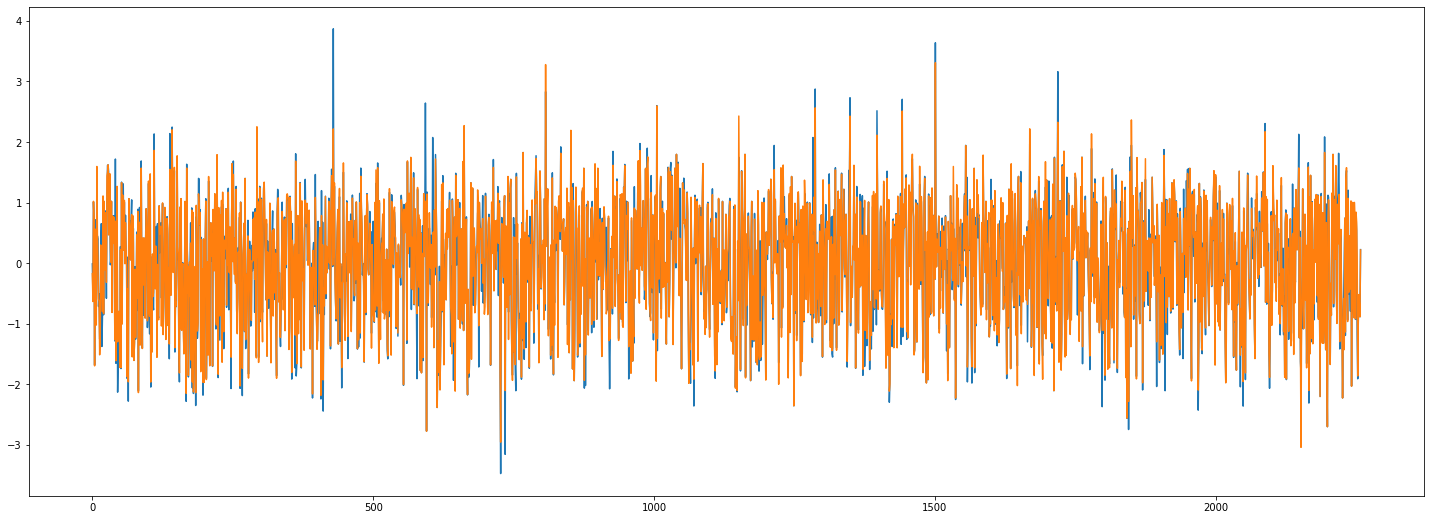

In [369]:
fig = plt.figure(figsize=(25, 9))
plt.plot(y_test.reset_index(drop=True))
plt.plot(preds)

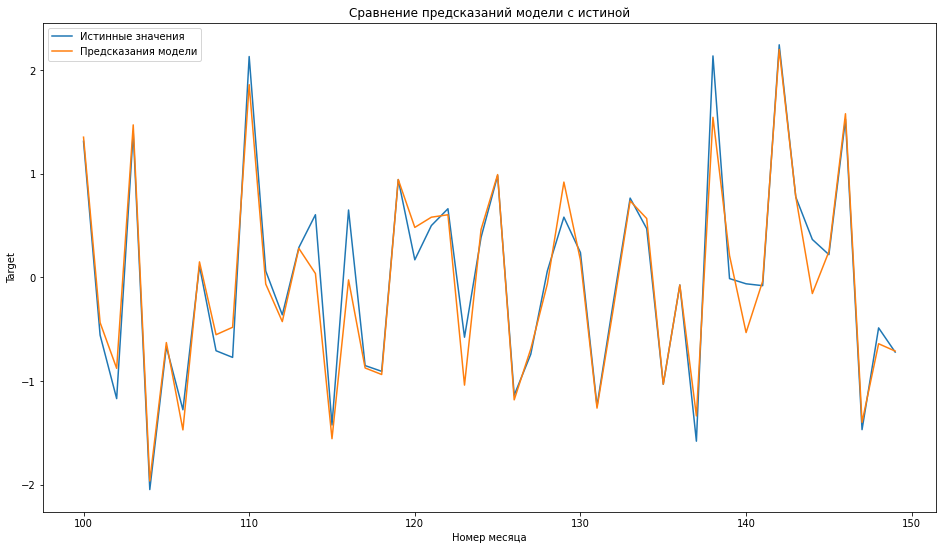

In [477]:
fig = plt.figure(figsize=(16, 9))
plt.plot(y_test.reset_index(drop=True)[100:150], label='Истинные значения')
plt.plot(preds[100:150], label='Предсказания модели')
plt.xlabel("Номер месяца")
plt.ylabel("Target")
plt.title('Сравнение предсказаний модели с истиной')
plt.legend()
plt.show()

Валидация на Test Example

In [255]:
def transform_date(train_month_df):
    train_month_df['month'] = [int(x[-2:]) for x in train_month_df['Unnamed: 0'].tolist()]
    train_month_df['year'] = [int(x[:2]) for x in train_month_df['Unnamed: 0'].tolist()]

    train_month_df['year'] -= train_month_df['year'].min()
    train_month_df['month_num'] = train_month_df['month'] + train_month_df['year'] * 12
    train_month_df.drop('Unnamed: 0', axis=1, inplace=True)

    return train_month_df

MAPE: 2.2022199180203703
MAE: 0.9526726996061874


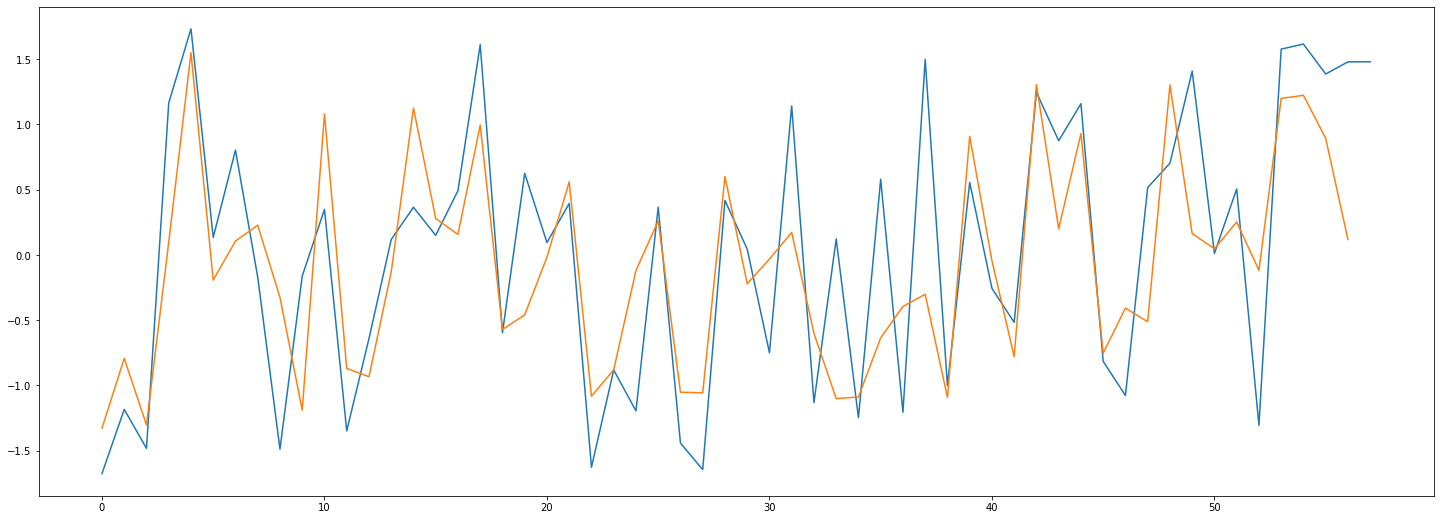

In [258]:
# Валидация на тест_example
test_example = pd.read_excel('/Users/nikitaromanov/Downloads/Участникам/Test_example5.xlsx')
test_example = transform_date(test_example)
test_example = test_example[test_example.Var1 != 'Forecast']
test_example['Var3'] = test_example.Var3 * 100
to_predict = make_features(test_example, ['Var3'])

preds = pd.DataFrame(model.predict(to_predict.drop('Total_Sales_dollars', axis=1)))
print('MAPE:', mean_absolute_percentage_error(to_predict['Total_Sales_dollars'], preds))
print('MAE:', mean_absolute_error(to_predict['Total_Sales_dollars'], preds))

fig = plt.figure(figsize=(25, 9))
plt.plot(to_predict['Total_Sales_dollars'][50:].reset_index(drop=True))     #   синий   - истинные значения
plt.plot(preds[51:].reset_index(drop=True))                                 # оранжевый - предсказания модели

In [68]:
test_example = pd.read_excel('/Users/nikitaromanov/Downloads/Участникам/Test_example5.xlsx')
test_example = transform_date(test_example)
test_example

,Var1,Var2,Var3,Var4,Var5,Var6,month,year,month_num
0,0.359536,0.132582,0.393563,0.245396,0.725491,0.361585,1,0,1
1,0.6493,0.057989,0.791482,0.167988,0.917368,0.475835,2,0,2
2,0.356093,0.253167,0.407549,0.420061,0.233546,0.274702,3,0,3
3,0.221301,0.99012,0.968295,0.834213,0.962607,0.354539,4,0,4
4,0.601777,0.11562,0.275767,0.407797,0.757938,0.97911,5,0,5
...,...,...,...,...,...,...,...,...,...
115,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,8,9,116
116,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,9,9,117
117,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,10,9,118
118,Forecast,Forecast,Forecast,Forecast,Forecast,Forecast,11,9,119


In [354]:
def predict_table(df, model):

    for column in df.columns.to_list()[:-3]:
        # df[column] = df[column][df[column] != 'Forecast'] * 100
        length = len(df[df[column] != 'Forecast'])
        df.loc[df[column]!='Forecast', column] *= 100
        for i in range(len(df[df[column] == 'Forecast'])):
            ft = df[df[column] != 'Forecast']
            to_predict = make_features(ft, [column])
            # print(len(df[df[column] != 'Forecast'])+i, i)
            df.loc[length+i, column] = model.predict(to_predict.drop('Total_Sales_dollars', axis=1))[-1]
    return df


predict_table(test_example, model)

,Var1,Var2,Var3,Var4,Var5,Var6,month,year,month_num
0,35.953622,13.258231,3935.630697,24.539643,72.549129,36.158531,1,0,1
1,64.929985,5.798889,7914.822571,16.798771,91.736806,47.583467,2,0,2
2,35.609281,25.316724,4075.488823,42.006057,23.354639,27.47019,3,0,3
3,22.130085,99.011952,9682.947357,83.42127,96.260744,35.45391,4,0,4
4,60.177704,11.56197,2757.674475,40.779747,75.793765,97.911019,5,0,5
...,...,...,...,...,...,...,...,...,...
103,64.268779,1.110855,9281.950385,48.772401,3.906112,5.304173,8,8,104
104,89.812659,88.160761,9391.423084,81.923987,96.049849,13.414617,9,8,105
105,91.706742,47.057372,8741.044552,51.831187,5.788873,24.961106,10,8,106
106,17.296052,75.177249,9004.958331,84.201172,54.87463,26.424638,11,8,107


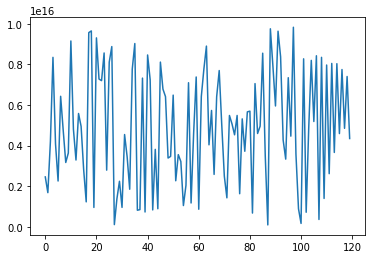

In [76]:
plt.plot(predict_table(test_example, model)['Var4'])

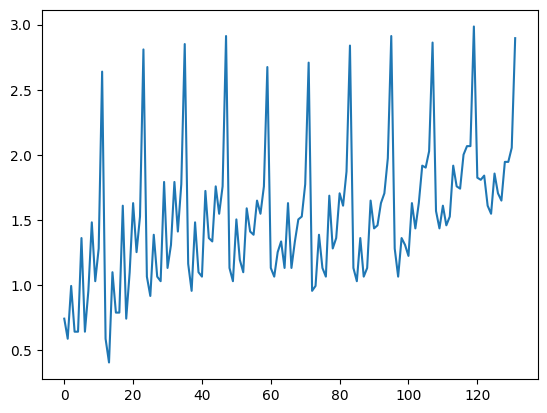

In [12]:
plt.plot(start)

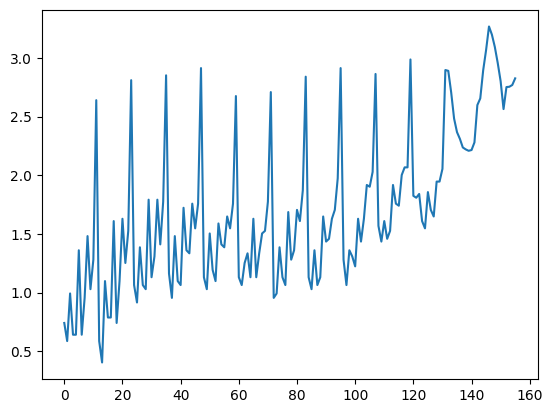

In [13]:
plt.plot(a)